In [1]:
%matplotlib inline

In [2]:
import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

Using TensorFlow backend.


In [3]:
model = ResNet50(weights='imagenet')
target_size = (224, 224)

In [4]:
def predict(model, img, target_size, top_n=3):
    """Run model prediction on image
    Args:
    model: keras model
    img: PIL format image
    target_size: (w,h) tuple
    top_n: # of top predictions to return
    Returns:
    list of predicted labels and their probabilities
    """
    if img.size != target_size:
        img = img.resize(target_size)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return decode_predictions(preds, top=top_n)[0]

In [5]:
def plot_preds(image, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
    image: PIL image
    preds: list of predicted labels and their probabilities
    """
    plt.imshow(image)
    plt.axis('off')

    plt.figure()
    order = list(reversed(range(len(preds))))
    bar_preds = [pr[2] for pr in preds]
    labels = (pr[1] for pr in preds)
    plt.barh(order, bar_preds, alpha=0.5)
    plt.yticks(order, labels)
    plt.xlabel('Probability')
    plt.xlim(0,1.01)
    plt.tight_layout()
    plt.show()

24576/35363 [===================>..........] - ETA: 0s

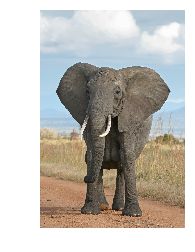

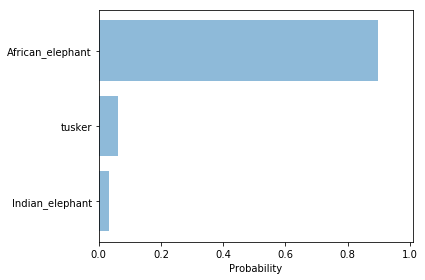

In [9]:
#'''
# argparse 模块通过终端命令行传入参数，如 python classify.py --image  images/African_Bush_Elephant.jpg
#'''

# a = argparse.ArgumentParser()
# a.add_argument("--image", help="path to image")
# a.add_argument("--image_url", help="url to image")
# args = a.parse_args()
# img = Image.open(args.image)

'''
交互行直接传入参数，img = Image.open('images/African_Bush_Elephant.jpg')
'''

img = Image.open('images/African_Bush_Elephant.jpg')
preds = predict(model, img, target_size)
plot_preds(img, preds)

<Response [200]>


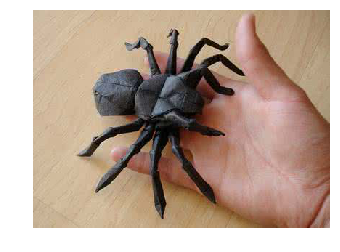

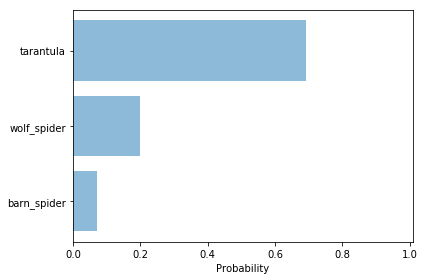

In [23]:
import requests
from io import BytesIO

img_url = 'https://ss3.bdstatic.com/70cFv8Sh_Q1YnxGkpoWK1HF6hhy/it/u=2553536315,3036208220&fm=26&gp=0.jpg'
response = requests.get(img_url)
print (response)

img = Image.open(BytesIO(response.content))
img.show()
preds = predict(model, img, target_size)
plot_preds(img, preds)

<Response [200]>


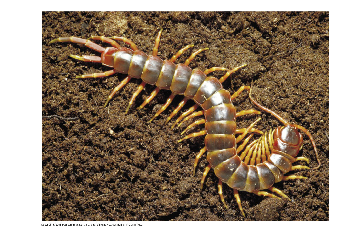

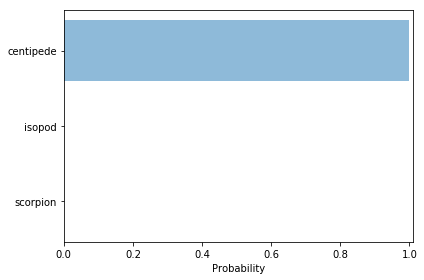

In [27]:
import requests
from io import BytesIO

img_url = 'http://science.kennesaw.edu/~jdirnber/Bio2108/Lecture/LecBiodiversity/33_Labeled_Images/33_34Centipede-L.jpg'
response = requests.get(img_url)
print (response)

img = Image.open(BytesIO(response.content))
img.show()
preds = predict(model, img, target_size)
plot_preds(img, preds)